# Dijkstra's Algorithm Walkthrough

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from algopy.algorithms import dijkstra

import json

%matplotlib inline

## 1. Build a Weighted Graph

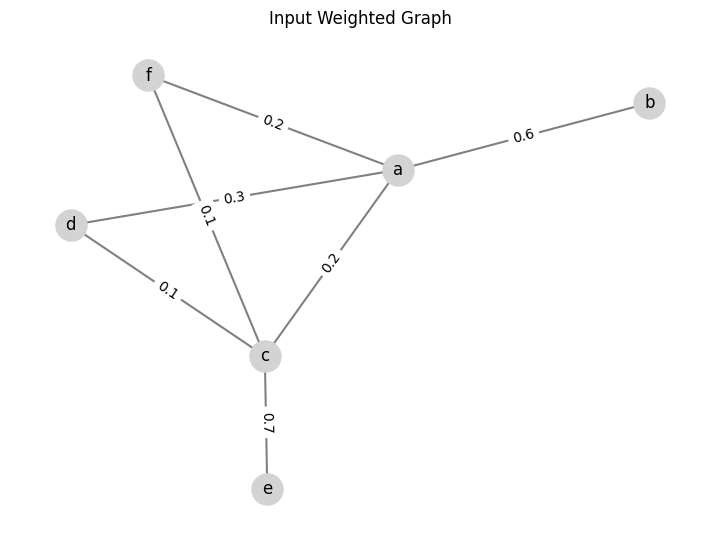

In [2]:
G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.1)
G.add_edge("a", "d", weight=0.3)
G.add_edge("a", "f", weight=0.2)

pos = nx.spring_layout(G, seed=42)

plt.figure(figsize=(7, 5))
nx.draw(
    G, pos, with_labels=True,
    node_color="lightgray", node_size=500,
    font_size=12, edge_color="gray", width=1.5,
)
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
plt.title("Input Weighted Graph")
plt.show()

## 2. Run Dijkstra and Visualize Each Iteration

Each snapshot contains:
- **S** (explored nodes) -- shown in orange
- **V\\S** (unexplored nodes) -- shown in light blue
- All weighted edges
- The cost matrix **A** with shortest-path cost and parent for every node


--------------------  Dijkstra Iteration 0 --------------------
S: ['a']
V_S: ['b', 'c', 'd', 'e', 'f']
{
    "a": {
        "node": "a",
        "cost": 0,
        "parent": null
    },
    "b": {
        "node": "b",
        "cost": Infinity,
        "parent": null
    },
    "c": {
        "node": "c",
        "cost": Infinity,
        "parent": null
    },
    "d": {
        "node": "d",
        "cost": Infinity,
        "parent": null
    },
    "e": {
        "node": "e",
        "cost": Infinity,
        "parent": null
    },
    "f": {
        "node": "f",
        "cost": Infinity,
        "parent": null
    }
}
-----------------------------------------------------------------



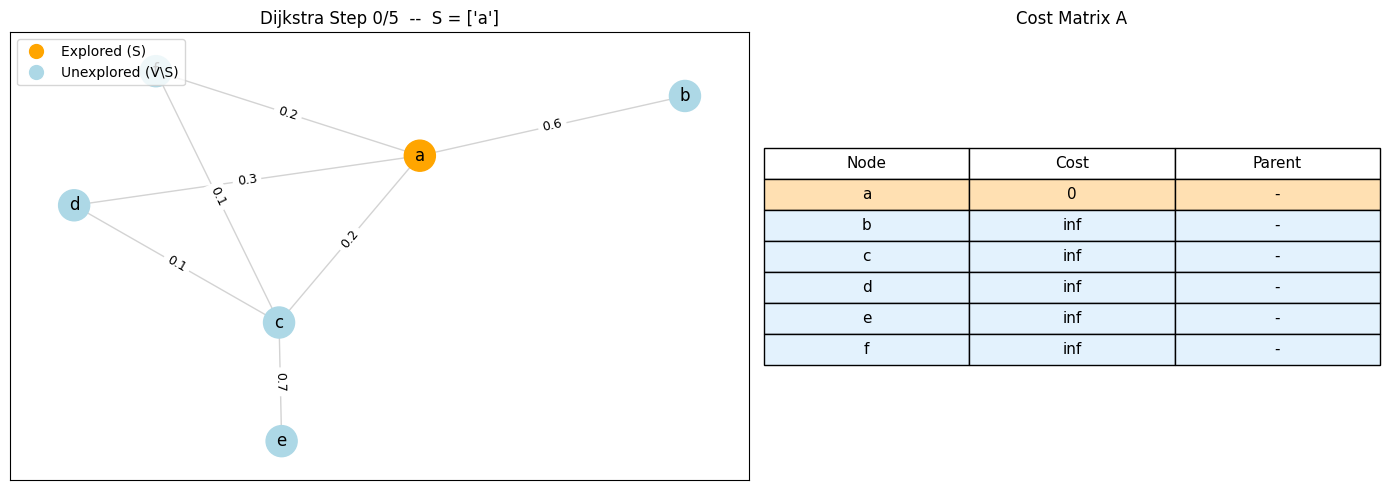


--------------------  Dijkstra Iteration 1 --------------------
S: ['a', 'c']
V_S: ['b', 'd', 'e', 'f']
{
    "a": {
        "node": "a",
        "cost": 0,
        "parent": null
    },
    "b": {
        "node": "b",
        "cost": Infinity,
        "parent": null
    },
    "c": {
        "node": "c",
        "cost": 0.2,
        "parent": "a"
    },
    "d": {
        "node": "d",
        "cost": Infinity,
        "parent": null
    },
    "e": {
        "node": "e",
        "cost": Infinity,
        "parent": null
    },
    "f": {
        "node": "f",
        "cost": Infinity,
        "parent": null
    }
}
-----------------------------------------------------------------



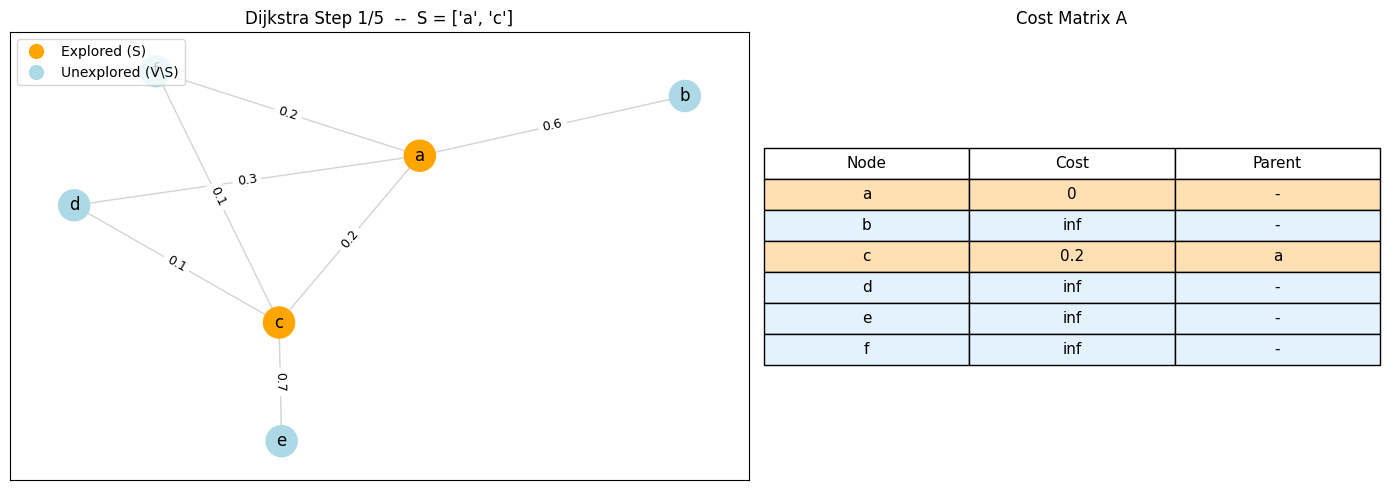


--------------------  Dijkstra Iteration 2 --------------------
S: ['a', 'c', 'f']
V_S: ['b', 'd', 'e']
{
    "a": {
        "node": "a",
        "cost": 0,
        "parent": null
    },
    "b": {
        "node": "b",
        "cost": Infinity,
        "parent": null
    },
    "c": {
        "node": "c",
        "cost": 0.2,
        "parent": "a"
    },
    "d": {
        "node": "d",
        "cost": Infinity,
        "parent": null
    },
    "e": {
        "node": "e",
        "cost": Infinity,
        "parent": null
    },
    "f": {
        "node": "f",
        "cost": 0.2,
        "parent": "a"
    }
}
-----------------------------------------------------------------



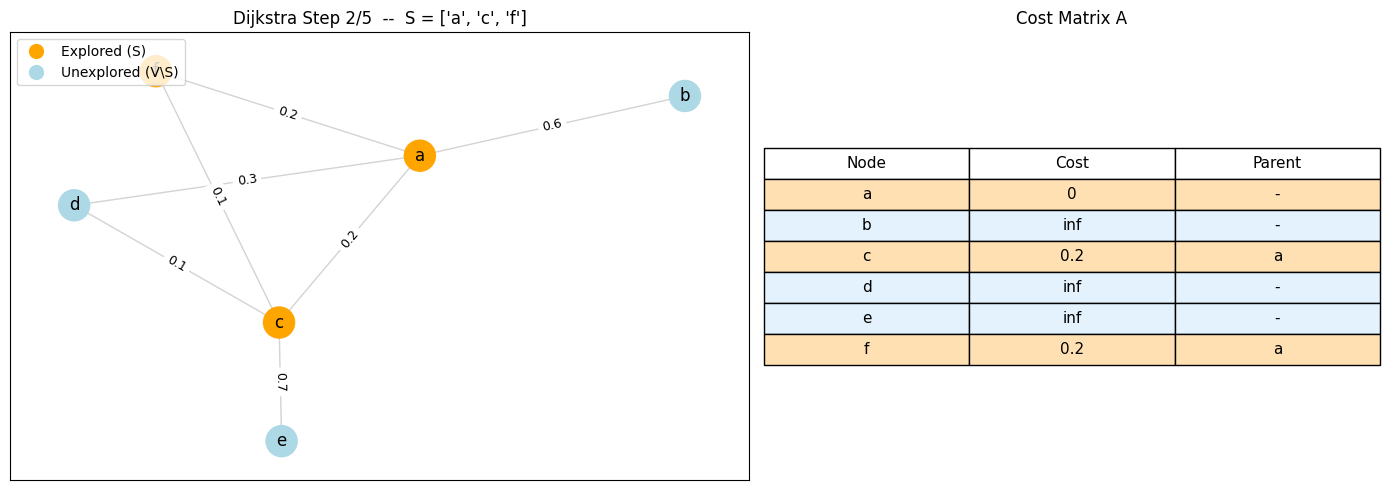


--------------------  Dijkstra Iteration 3 --------------------
S: ['a', 'c', 'd', 'f']
V_S: ['b', 'e']
{
    "a": {
        "node": "a",
        "cost": 0,
        "parent": null
    },
    "b": {
        "node": "b",
        "cost": Infinity,
        "parent": null
    },
    "c": {
        "node": "c",
        "cost": 0.2,
        "parent": "a"
    },
    "d": {
        "node": "d",
        "cost": 0.3,
        "parent": "a"
    },
    "e": {
        "node": "e",
        "cost": Infinity,
        "parent": null
    },
    "f": {
        "node": "f",
        "cost": 0.2,
        "parent": "a"
    }
}
-----------------------------------------------------------------



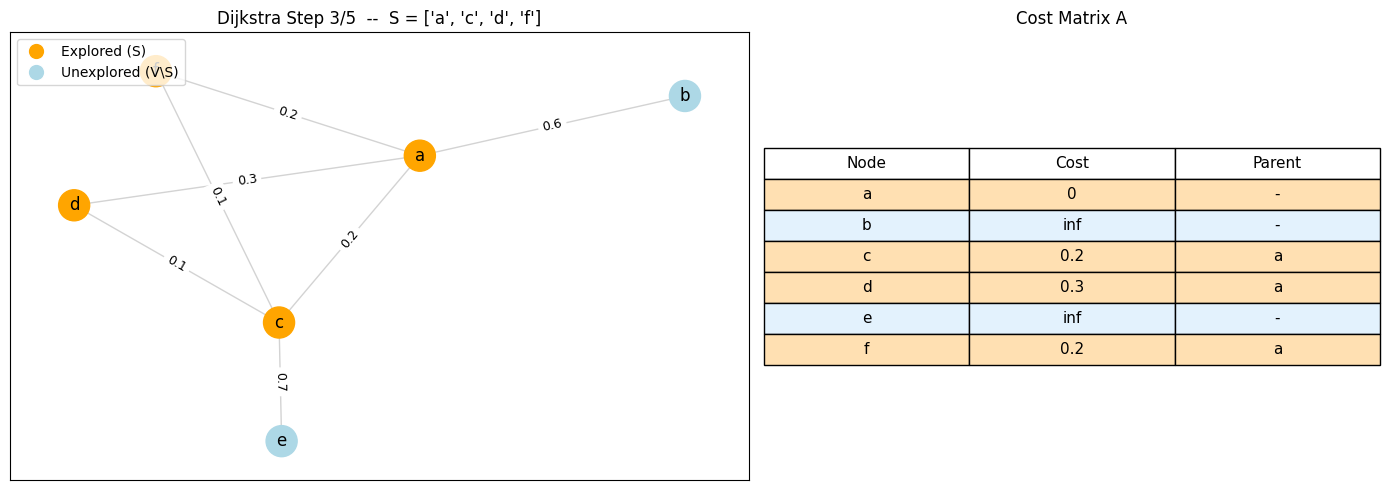


--------------------  Dijkstra Iteration 4 --------------------
S: ['a', 'b', 'c', 'd', 'f']
V_S: ['e']
{
    "a": {
        "node": "a",
        "cost": 0,
        "parent": null
    },
    "b": {
        "node": "b",
        "cost": 0.6,
        "parent": "a"
    },
    "c": {
        "node": "c",
        "cost": 0.2,
        "parent": "a"
    },
    "d": {
        "node": "d",
        "cost": 0.3,
        "parent": "a"
    },
    "e": {
        "node": "e",
        "cost": Infinity,
        "parent": null
    },
    "f": {
        "node": "f",
        "cost": 0.2,
        "parent": "a"
    }
}
-----------------------------------------------------------------



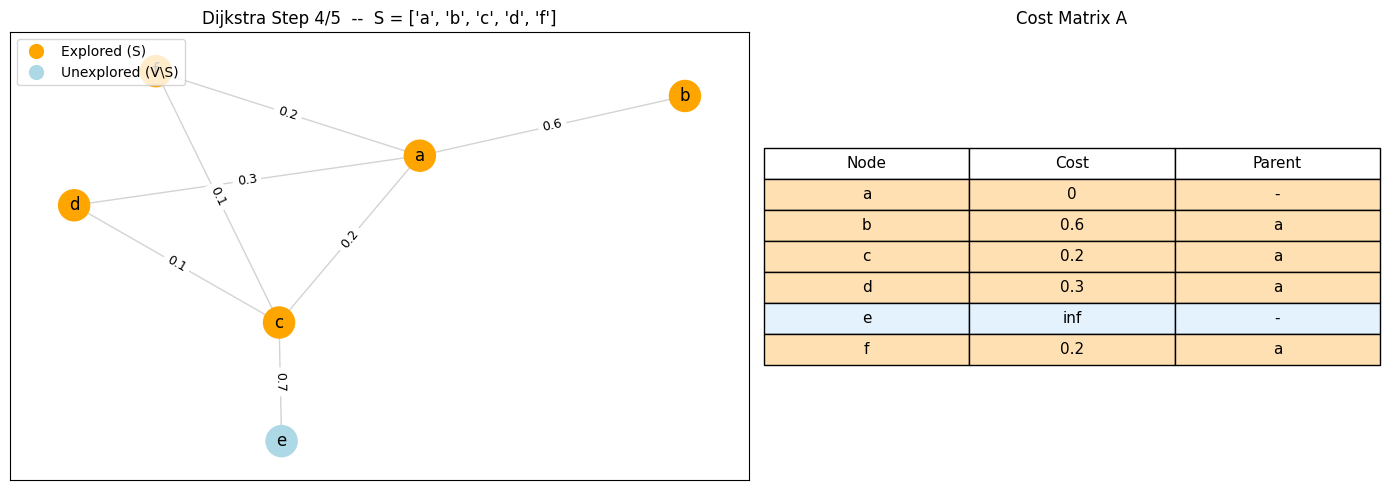


--------------------  Dijkstra Iteration 5 --------------------
S: ['a', 'b', 'c', 'd', 'e', 'f']
V_S: []
{
    "a": {
        "node": "a",
        "cost": 0,
        "parent": null
    },
    "b": {
        "node": "b",
        "cost": 0.6,
        "parent": "a"
    },
    "c": {
        "node": "c",
        "cost": 0.2,
        "parent": "a"
    },
    "d": {
        "node": "d",
        "cost": 0.3,
        "parent": "a"
    },
    "e": {
        "node": "e",
        "cost": 0.9,
        "parent": "c"
    },
    "f": {
        "node": "f",
        "cost": 0.2,
        "parent": "a"
    }
}
-----------------------------------------------------------------



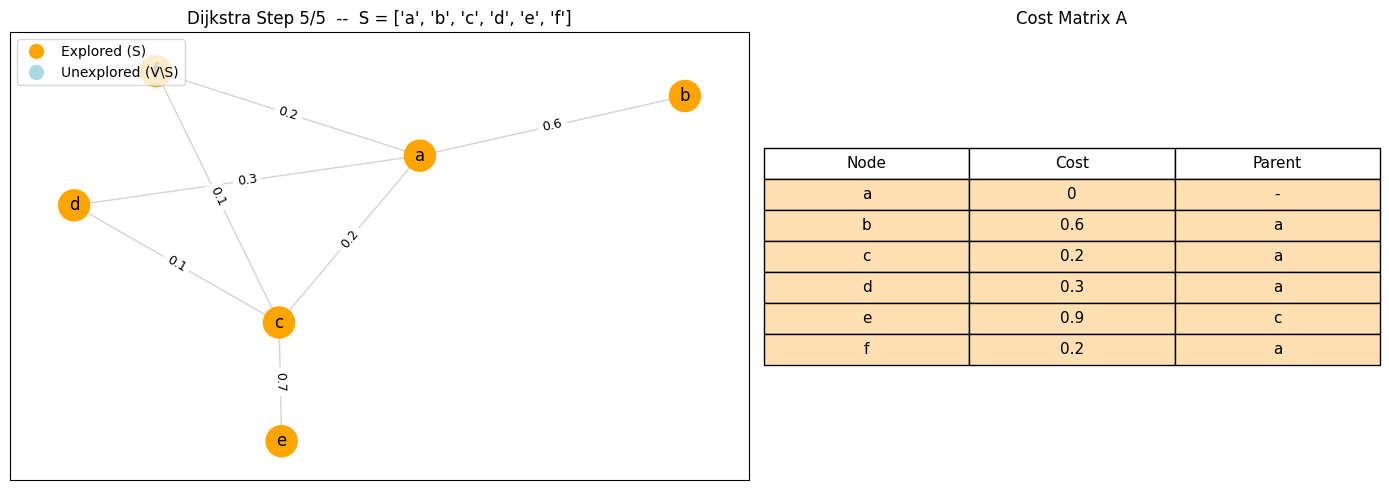

In [3]:
start_node = "a"
snapshots = list(dijkstra(G, start_node))

edge_labels = nx.get_edge_attributes(G, "weight")

for idx, (S, V_S, graph_edges, A) in enumerate(snapshots):
    
    print(f"\n--------------------  Dijkstra Iteration {idx} --------------------")
    print(f"S: {S}")
    print(f"V_S: {V_S}")
    print(f"{json.dumps(A, indent=4)}")
    print("-----------------------------------------------------------------\n")

    
    fig, (ax_graph, ax_table) = plt.subplots(
        1, 2, figsize=(14, 5),
        gridspec_kw={"width_ratios": [1.2, 1]},
    )

    # -- Left: graph plot --
    node_colors = ["orange" if n in S else "lightblue" for n in G.nodes()]

    nx.draw_networkx_edges(G, pos, edge_color="lightgray", width=1.0, ax=ax_graph)
    nx.draw_networkx_nodes(
        G, pos, node_color=node_colors, node_size=500, ax=ax_graph,
    )
    nx.draw_networkx_labels(G, pos, font_size=12, ax=ax_graph)
    nx.draw_networkx_edge_labels(
        G, pos, edge_labels=edge_labels, font_size=9, ax=ax_graph,
    )

    legend_elements = [
        Line2D([0], [0], marker="o", color="w",
               markerfacecolor="orange", markersize=12, label="Explored (S)"),
        Line2D([0], [0], marker="o", color="w",
               markerfacecolor="lightblue", markersize=12, label="Unexplored (V\\S)"),
    ]
    ax_graph.legend(handles=legend_elements, loc="upper left")
    ax_graph.set_title(
        f"Dijkstra Step {idx}/{len(snapshots) - 1}  --  S = {S}"
    )

    # -- Right: cost table --
    col_labels = ["Node", "Cost", "Parent"]
    table_data = []
    for node in G.nodes():
        entry = A[node]
        cost = entry["cost"]
        cost_str = str(cost) if cost != float("inf") else "inf"
        parent_str = str(entry["parent"]) if entry["parent"] is not None else "-"
        table_data.append([str(node), cost_str, parent_str])

    ax_table.axis("off")
    table = ax_table.table(
        cellText=table_data,
        colLabels=col_labels,
        cellLoc="center",
        loc="center",
    )
    table.auto_set_font_size(False)
    table.set_fontsize(11)
    table.scale(1.0, 1.6)

    # Highlight explored rows
    for row_idx, node in enumerate(G.nodes()):
        color = "#FFE0B2" if node in S else "#E3F2FD"
        for col_idx in range(len(col_labels)):
            table[row_idx + 1, col_idx].set_facecolor(color)

    ax_table.set_title("Cost Matrix A")

    plt.tight_layout()
    plt.show()

## 3. Final Shortest-Path Tree

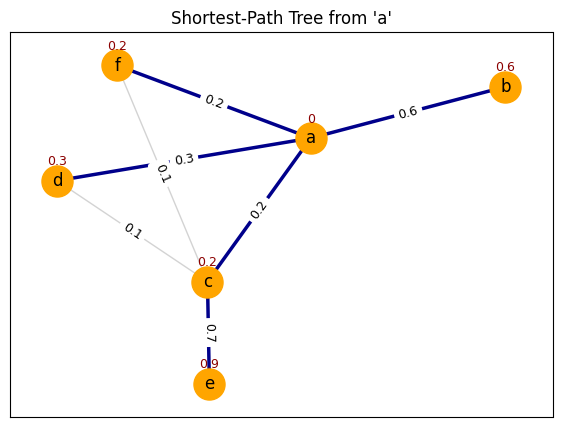

In [4]:
# Build the shortest-path tree from the final cost matrix
_, _, _, final_A = snapshots[-1]

tree_edges = []
for node, entry in final_A.items():
    if entry["parent"] is not None:
        tree_edges.append((entry["parent"], node))

plt.figure(figsize=(7, 5))

nx.draw_networkx_edges(G, pos, edge_color="lightgray", width=1.0)
nx.draw_networkx_edges(
    G, pos, edgelist=tree_edges, edge_color="darkblue", width=2.5,
)
nx.draw_networkx_nodes(G, pos, node_color="orange", node_size=500)
nx.draw_networkx_labels(G, pos, font_size=12)

# Annotate each node with its shortest-path cost
cost_labels = {
    node: f"{entry['cost']}" for node, entry in final_A.items()
}
label_pos = {k: (v[0], v[1] + 0.1) for k, v in pos.items()}
nx.draw_networkx_labels(
    G, label_pos, labels=cost_labels, font_size=9, font_color="darkred",
)

nx.draw_networkx_edge_labels(
    G, pos, edge_labels=nx.get_edge_attributes(G, "weight"), font_size=9,
)

plt.title(f"Shortest-Path Tree from '{start_node}'")
plt.show()